In [1]:
    try:
        from google.colab import drive

        print('Colab environment detected. Mounting drive...')
        drive.mount('/content/drive')

        print('Mounted. Switching to directory... ', end = '')
        %cd /content/drive/'My Drive'/CILroadseg
        print('done.')
    except:
        print('Colab environment not found. Working on ordinary directory.')

Colab environment detected. Mounting drive...
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Mounted. Switching to directory... /content/drive/My Drive/CILroadseg
done.


In [2]:
import numpy as np
import sys
import os
import matplotlib.image as mpimg

from util.submit import *
from util.helpers import *
from util.visualize import *
from util.notebooks import *
from util.cross_validation import cross_validate

## Loading Training Data

In [3]:
train_dir = "training/images/"
gt_dir = "training/groundtruth/"
test_dir = "test/images/"

X, Y, X_test = nb_load_data(train_dir, gt_dir, test_dir)

Loading training input...
Progress: done (100 images).
Loading training groundtruth...
Progress: done (100 images).
Loading test input...
Progress: done (94 images).

       Training data shape: (100, 400, 400, 3)
Training groundtruth shape: (100, 400, 400)
           Test data shape: (94, 608, 608, 3)


## Decomposer + ResNet/CNN

In [4]:
import tensorflow as tf
from tensorflow import keras

from decomposer import *
from rotate_vote import *
from zero_classifier import *
from cnn_new import *
from cnn import *

Using TensorFlow backend.


In [5]:
model = Decomposer(ConvNetModel())

q
Epoch 1/200
 - 264s - loss: 0.3255 - accuracy: 0.8561 - val_loss: 0.2626 - val_accuracy: 0.8759
Epoch 2/200
 - 256s - loss: 0.2242 - accuracy: 0.9074 - val_loss: 0.2959 - val_accuracy: 0.8866
Epoch 3/200
 - 256s - loss: 0.1940 - accuracy: 0.9219 - val_loss: 0.3284 - val_accuracy: 0.8229
Epoch 4/200
 - 255s - loss: 0.1796 - accuracy: 0.9267 - val_loss: 0.2196 - val_accuracy: 0.9075
Epoch 5/200
 - 255s - loss: 0.1725 - accuracy: 0.9307 - val_loss: 0.1717 - val_accuracy: 0.9111
Epoch 6/200
 - 256s - loss: 0.1680 - accuracy: 0.9326 - val_loss: 0.1643 - val_accuracy: 0.9286
Epoch 7/200
 - 255s - loss: 0.1628 - accuracy: 0.9347 - val_loss: 0.2086 - val_accuracy: 0.9277
Epoch 8/200
 - 255s - loss: 0.1582 - accuracy: 0.9364 - val_loss: 0.1252 - val_accuracy: 0.9424
Epoch 9/200
 - 255s - loss: 0.1532 - accuracy: 0.9377 - val_loss: 0.2166 - val_accuracy: 0.9242
Epoch 10/200
 - 254s - loss: 0.1528 - accuracy: 0.9385 - val_loss: 0.5091 - val_accuracy: 0.8590
Epoch 11/200
 - 254s - loss: 0.1472 -

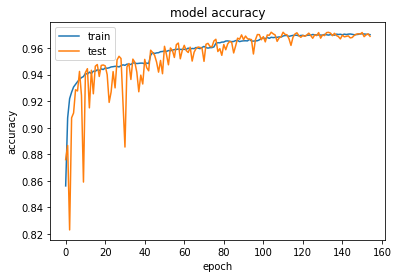

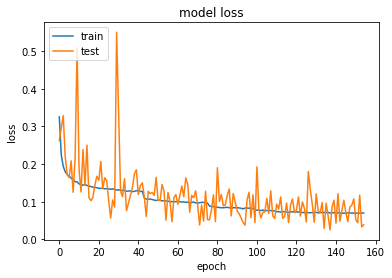

In [6]:
choice = 'tr'

np.random.seed(1) #fix randomness
if choice == 'cv':
  cross_validate(model, 10, X, Y)

elif choice == 'tr':
  model.initialize()
  model.train(Y, X) 

else:
  model.initialize()
  model.load("saves/final/convnet4.h5")

## Model Saving

In [7]:
weights_file = "saves/final/convnet4.h5"

nb_save_model(model, weights_file) 

[Target file: saves/final/convnet4.h5]
Saving model to disk...done.


In [8]:
test_masks_dir = "test/pred/"
test_dir = "test/images/"

from recomposer import *
model = Recomposer(model)
 
nb_predict_masks(model, test_dir, test_masks_dir)

Predicting test cases... 
Progress: done.


In [9]:
image_paths = [test_masks_dir + file for file in os.listdir(test_masks_dir)]

masks_to_submission("test/convnet4.csv", image_paths)

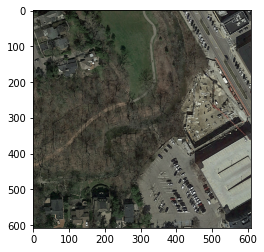

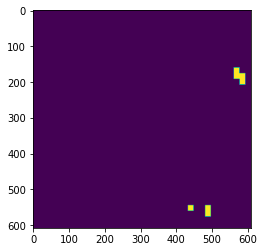

In [14]:
Y_pred = model.classify(X_test[0:10])

view_image_mask(X_test[2], Y_pred[2])